In [11]:
import opstrat as op
import numpy as np

In [12]:
underlying = 165
strike = 165
days=15
tradingDayYear=365
ttm = days/tradingDayYear
rf = 0.0425
q = 0.0053

In [16]:
K=165  #Strike price
st=165   #current price
r=0.0425     
t=15     
v=10     
n=2
coupon = 0.53
r=r-coupon
bsm=op.black_scholes(K=K, St=st, r=r, t=t, v=v, type='c')

1.3180681333099074

In [17]:
vec = np.linspace(10, 80, 8) 
c = []
p = []
for v in vec:
    bsm=op.black_scholes(K=K, St=st, r=r, t=t, v=v, type='c')
    x = bsm['value']['option value']
    c.append(x)
    bsm=op.black_scholes(K=K, St=st, r=r, t=t, v=v, type='p')
    y = bsm['value']['option value']
    p.append(y)

<AxesSubplot:>

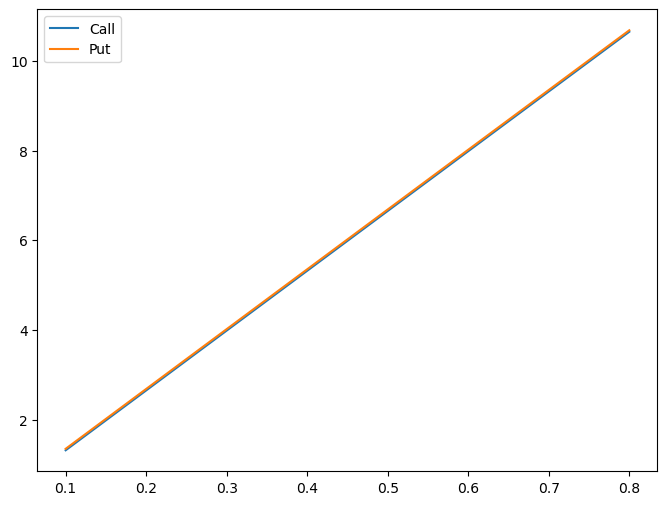

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
vec = np.linspace(0.1, 0.8, 8) 
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(vec, c, ax=ax, label='Call')
sns.lineplot(vec, p, ax=ax, label='Put')